In [19]:
%matplotlib inline
import intake
from intake import open_catalog

For local shapefiles, we will again use a YAML file to create a catalog. An important point for this YAML file is that unlike our remote shapefiles, to read in local shapefiles from a zip file it is necessary to include in the urlpath "zip://..." before the path to the zip file. The urlpath for remote shapefiles only requires the download url for the zip file by itself since the shapefile driver is capable of parsing this compressed file for our shapefile. However, for some reason, the shapefile driver isn't capable of reading local zip files unless they have been declared as zip files. The logic of this isn't clear, but to avoid any errors, include "zip://" before the rest of the path to the file.

In [47]:
catalog = intake.open_catalog('local_shp.yml') #reading in new YAML file with updated data
print(list(catalog))

['la_open_data', 'la_county', 'county_stations', 'alternative_fuel']


Having read in the YAML file to create a new catalog, we can now proceed similarly to all the other file types. We can now create a new data frame from the catalog and process the data.

In [48]:
fuel = catalog.county_stations
stations = catalog.county_stations.read()

In [49]:
hybrid = catalog.alternative_fuel
alternatives = catalog.alternative_fuel.read()

In [50]:
county = catalog.la_county
county_boundary = catalog.la_county.read()

In [51]:
open_data = catalog.la_open_data
open_data_boundary = open_data.search('boundary')
city_boundary = open_data_boundary['https://data.lacity.org/api/views/ppge-zfr4'].read()

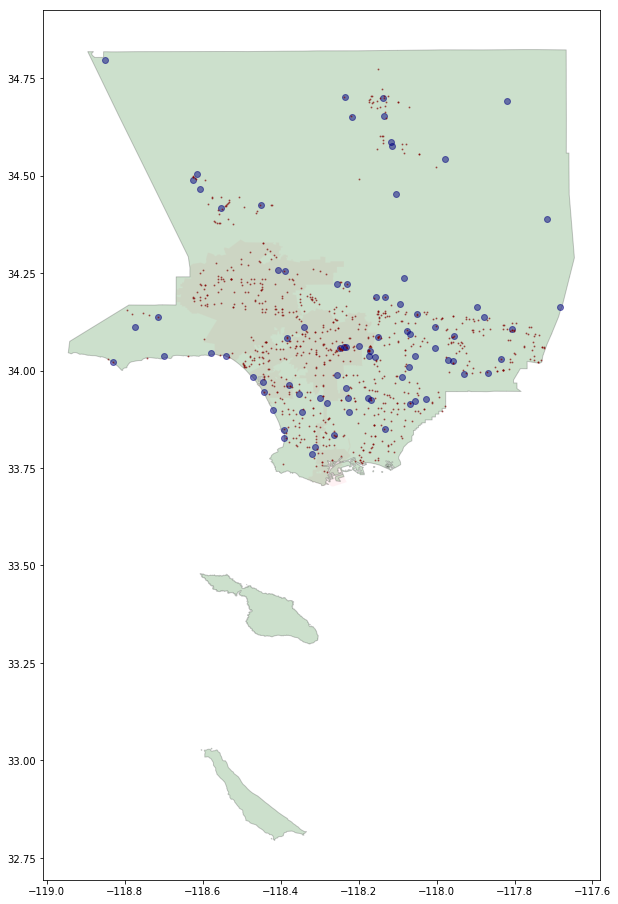

In [52]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(16,16))
city_boundary.plot(ax=ax, color='pink', alpha=0.2, linewidth=1, edgecolor='white')
county_boundary.plot(ax=ax, color='darkgreen', alpha=0.2, linewidth=1, edgecolor='black')
stations.plot(ax=ax, color='navy', alpha=0.5, linewidth=1)
alternatives.plot(ax=ax, color='maroon', alpha=0.5, markersize=1)